In [17]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from scipy import stats
from sklearn.neighbors.kde import KernelDensity
from multiprocessing import Pool
import datetime as dt
import util
import pandas as pd
import seaborn as sns; sns.set()
import pprint
import functools

In [119]:
symbols = pd.read_csv('data/SP500.csv',  usecols=['Symbol', 'Sector'])
sectors = set(symbols.to_dict(orient='list')['Sector'])
d = [(key,value) for (key, value) in symbols.to_dict(orient='split')['data']]
pprint.pprint(sectors)
d.remove(('FTV','Industrials'))
d.remove(('LMT','Industrials'))
d.remove(('NLSN','Industrials'))
d.remove(('CHTR','Consumer Discretionary'))
d.remove(('NWL','Consumer Discretionary'))
d.remove(('UA','Consumer Discretionary'))
d.remove(('KHC','Consumer Staples'))
d.remove(('EVHC','Health Care'))
d.remove(('WRK','Materials'))
d.remove(('AVGO','Information Technology'))
d.remove(('CSRA','Information Technology'))
d.remove(('DXC','Information Technology'))
d.remove(('HPE','Information Technology'))
d.remove(('PYPL','Information Technology'))
d.remove(('AMT','Real Estate'))
d.remove(('NBL','Energy'))
d.remove(('FTI','Energy'))
d.remove(('XL','Financials'))

set(['Consumer Discretionary',
     'Consumer Staples',
     'Energy',
     'Financials',
     'Health Care',
     'Industrials',
     'Information Technology',
     'Materials',
     'Real Estate',
     'Telecommunication Services',
     'Utilities'])


In [7]:
def profitmap(year,df):
    A=np.zeros( (252,252) )
    for x in range(0,252):
        for y in range(0,252):
            sd = dt.date(year,1,1)+dt.timedelta(x)
            ed = dt.date(year,1,1)+dt.timedelta(y)
            if y<x:
                ed = dt.date(year,1,1)+dt.timedelta(y+365)
            if sd in df.index and ed in df.index:
                A[x][y]=(df.loc[ed]/df.loc[sd]) -1
    return A


def profitmap2(year,df):
    sy = dt.date(year,1,1)
    data = df[sy:]
    A=np.zeros( (252,252))
    for x in range(0,252):
        for y in range(0,252):
            si = x
            ei = si + y
            A[x,y]=(data.ix[ei]/data.ix[si]) -1
    return A

def profitmap3(year,df):
    sy= dt.date(year,1,1)
    data = df[sy:]
    A=np.zeros( (252,252) )
    for x in range(0,252):
        vector = data.iloc[x:x+252]
        A[x,] = np.array((vector / vector.iloc[0]) -1).reshape(252)
    return A

def profit_density(profit_map,min_ret=0.1,max_ret=1.0):
    density_map = list()
    for row in range(0,252):
        a = profit_map[row]
        x= np.linspace(a.min(),a.max(), num=252)
        kernel = stats.gaussian_kde(a)
        density_map.append(kernel.integrate_box_1d(min_ret,max_ret))
    return density_map

In [ ]:
sd = dt.date(2005,1,1)
ed = dt.date(2017,12,31)

In [122]:
p=Pool(5)
promaps = {}
for sector in list(sectors):
    print sector
    syms = map(lambda x: x[0], filter(lambda x: x[1] == sector, d))
    sym_maps = []
    for sym in syms:
        print sym
        df = pd.DataFrame(web.DataReader(sym, 'google', sd, ed)['Close'])
        maps = p.map(functools.partial( profitmap3, df=df) ,range(2005,2015))
        m=np.hstack(maps)
        sym_maps.append(m)
    promaps[sector]=np.hstack(sym_maps)

Industrials
MMM
AYI
ALK
ALLE
AAL
AME
ARNC
BA
CHRW
CAT
CTAS
CSX
CMI
DE
DAL
DOV
ETN
EMR
EFX
EXPD
FAST
FDX
FLS
FLR
FBHS
GD
GE
GWW
HON
INFO
ITW
IR
JEC
JBHT
JCI
KSU
LLL
MAS
NSC
NOC
PCAR
PH
PNR
PWR
RTN
RSG
RHI
ROK
COL
ROP
R
LUV
SRCL
TXT
TDG
UNP
UAL
UPS
URI
UTX
VRSK
WM
XYL
Telecommunication Services
T
CTL
LVLT
VZ
Consumer Discretionary
AAP
AMZN
AN
AZO
BBBY
BBY
BWA
KMX
CCL
CBS
CMG
COH
CMCSA
DHI
DRI
DLPH
DISCA
DISCK
DISH
DG
DLTR
EXPE
FL
F
GPS
GRMN
GM
GPC
GT
HBI
HOG
HAS
HD
IPG
KSS
LB
LEG
LEN
LKQ
LOW
M
MAR
MAT
MCD
KORS
MHK
NWSA
NWS
NKE
JWN
ORLY
OMC
RL
PCLN
PHM
PVH
ROST
RCL
SNI
SIG
SNA
SWK
SPLS
SBUX
TGT
TIF
TWX
TJX
TSCO
TRIP
FOXA
FOX
ULTA
UAA
VFC
VIAB
DIS
WHR
WYN
WYNN
YUM
Utilities
AES
LNT
AEE
AEP
AWK
CNP
CMS
ED
D
DTE
DUK
EIX
ETR
ES
EXC
FE
NEE
NI
NRG
PCG
PNW
PPL
PEG
SCG
SRE
SO
WEC
XEL
Consumer Staples
MO
ADM
BF.B
CPB
CHD
CLX
KO
CL
CAG
STZ
COST
COTY
CVS
DPS
EL
GIS
HSY
HRL
SJM
K
KMB
KR
MKC
MJN
TAP
MDLZ
MNST
PEP
PM
PG
RAI
SYY
TSN
WMT
WBA
WFM
Health Care
ABT
ABBV
AET
A
ALXN
AGN
ABC
AMGN
ANTM
BCR
BAX
B

<IPython.core.display.Javascript object>


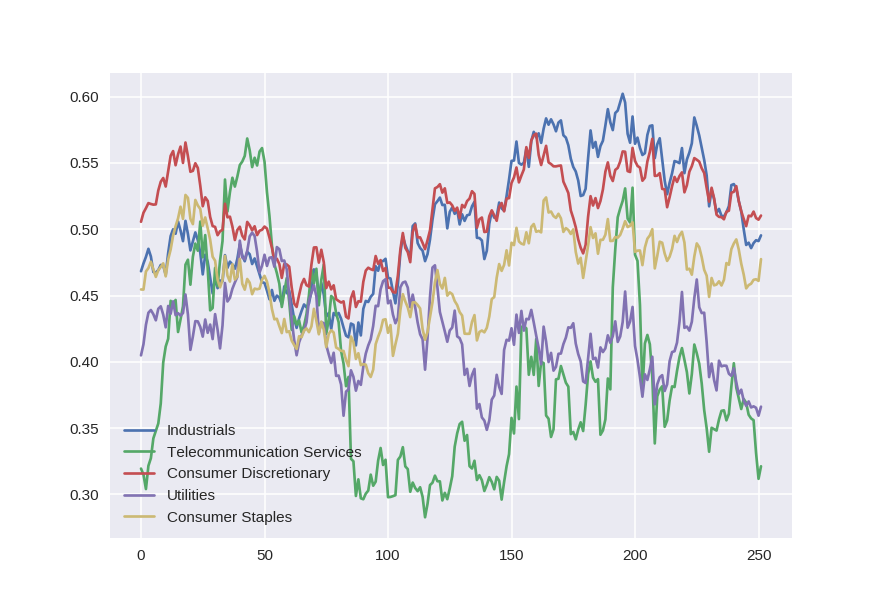

<IPython.core.display.Javascript object>


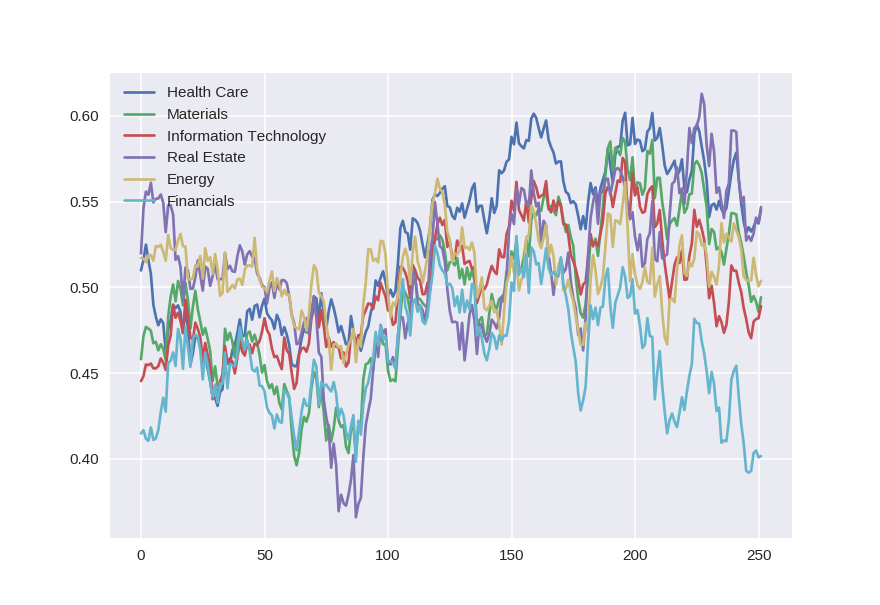

In [127]:
fig, ax = plt.subplots()
for sector in list(sectors)[:5]:
    ax.plot(profit_density(promaps[sector],0.05,5), label=sector)
plt.legend()
plt.show()
fig, ax = plt.subplots()
for sector in list(sectors)[5:]:
    ax.plot(profit_density(promaps[sector],0.05,5), label=sector)
plt.legend()
plt.show()

(252L, 75600L)


<IPython.core.display.Javascript object>


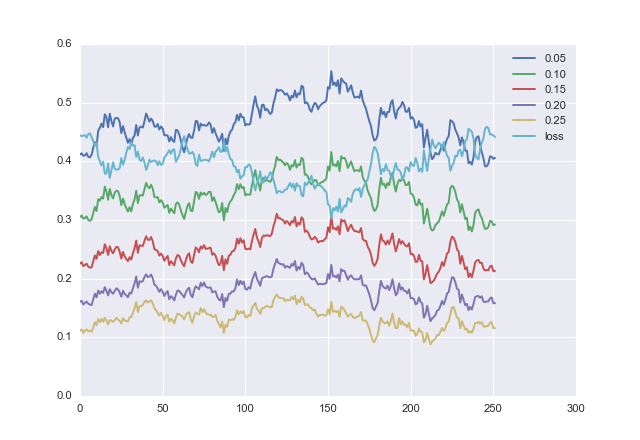

In [23]:
C=np.hstack(sym_maps)
print C.shape
fig, ax = plt.subplots()
for x in np.linspace(0.05, 0.25,5 ):
    ax.plot(profit_density(C,x,5), label="%0.2f"%x)
ax.plot(profit_density(C,-1,0), label="loss")
plt.legend()
plt.show()

In [ ]:
D=np.array(profit_density(C,0.05,5))
print D.mean()
print D.std()
s=  D.mean() +D.std()
D > s

In [24]:
year = 2016
sy = dt.date(year,1,1)          
data = df[sy:]
print data.ix[150]

Close    40.63
Name: 2016-08-08 00:00:00, dtype: float64


(252L, 504L)


<IPython.core.display.Javascript object>


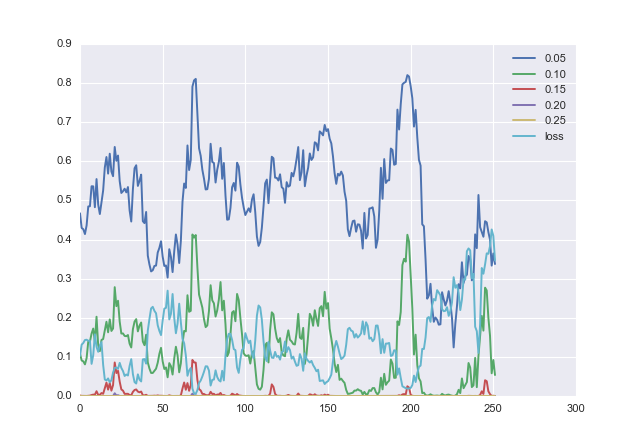

In [21]:
sym='FNCL'
df = pd.DataFrame(web.DataReader(sym, 'google', sd, ed)['Close'])
C=np.hstack( map(lambda x: profitmap3(x,df) ,range(2013,2015)))
print C.shape
fig, ax = plt.subplots()
for x in np.linspace(0.05, 0.25,5 ):
    ax.plot(profit_density(C,x,5), label="%0.2f"%x)
ax.plot(profit_density(C,-1,0), label="loss")
plt.legend()
plt.show()

In [ ]:
df['FNCL'].index[2500]

In [ ]:
goog_profitmap = lambda x: profitmap2(x,df['AKAM'])
maps = map(goog_profitmap,range(2005,2015))
A=sum(np.log(maps))
A=A/len(maps)
A= (10 ** A) -1 


In [ ]:
B=A[:,:100]
fig, ax = plt.subplots()
ax = sns.heatmap(B,xticklabels=5,yticklabels=15)

In [ ]:
def examine_year(year,sym,si,ei):
    sy = dt.date(year,1,1)   
    data = df[sym][sy:]
    a= data.ix[si]
    b= data.ix[si + ei]
    print a,b, b/a, ((b/a) -1) * 100 
    print data.index[si],data.index[si+ei]

eyear = lambda year: examine_year(year,'AKAM',121,34)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(eyear, year=(2005,2017));

In [ ]:
a=enumerate(df['AAPL'][dt.date(2017,1,1):].index)
[x for x in a]

In [ ]:
np.argmax(A[84, ])
A[84,173]